# TRAVAUX PRATIQUES GROUPE 6 K-MEANS: Prédiction du cancer de sein

# 1- Formulation d'une solution 
&emsp;&emsp;Pour aborder ce problème de classification sur le cancer du sein, l'utilisation d'un modèle basé sur l'algorithme K-means pourrait être envisagée pour assigner efficacement les patients aux catégories de témoins sains ou de patientes atteintes de cancer du sein, en se basant sur leurs caractéristiques cliniques.

# 2- Collecte des données
&emsp;&emsp;Nous avons recueilli le dataset sur kaggle: https://www.kaggle.com/datasets/tanshihjen/coimbra-breastcancer/data
    
&emsp;&emsp;Cet ensemble de données présente une exploration complète des caractéristiques cliniques observées ou mesurées chez 64 patientes atteintes d'un cancer du sein et 52 témoins sains. L'ensemble de données comprend à la fois des attributs quantitatifs et des étiquettes correspondantes pour une analyse et une modélisation efficaces.

**Attributs quantitatifs :**

- **Âge (années):** Âge des individus.
- **IMC (kg/m²):** Indice de masse corporelle, une mesure de la graisse corporelle basée sur le poids et la taille.
- **Glucose (mg/dL):** Glycémie, un indicateur métabolique important.
- **Insuline (µU/mL):** Taux d'insuline, une hormone liée à la régulation du glucose.
- **HOMA:** Homeostatic Model Assessment, une méthode d’évaluation de la résistance à l’insuline et de la fonction des cellules bêta.
- **Leptine (ng/mL):** Taux de leptine, une hormone impliquée dans la régulation de l'appétit et de l'équilibre énergétique.
- **Adiponectine (µg/mL):** Taux d'adiponectine, une protéine associée à la régulation métabolique.
- **Résistine (ng/mL):** Niveaux de résistine, une protéine impliquée dans la résistance à l'insuline.
- **MCP-1 (pg/dL):** Monocyte Chemoattractant Protein-1, une cytokine impliquée dans l'inflammation.

**Étiquettes:**

- **1 :** Témoins sains
- **2 :** Patientes atteintes d’un cancer du sein



# 3-Prétraitement des données 
## Importation des bibliothèques


In [32]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from kneed import KneeLocator 
import missingno as msno
import numpy as np
import seaborn as sns

from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [33]:
#Chargement du dataset
data=pd.read_csv('Coimbra_breast_cancer_dataset.csv')

In [34]:
# Ouverture du dataset
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [35]:
#Exploration des données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [36]:
print(data.describe())

              Age         BMI     Glucose     Insulin        HOMA      Leptin  \
count  116.000000  116.000000  116.000000  116.000000  116.000000  116.000000   
mean    57.301724   27.582111   97.793103   10.012086    2.694988   26.615080   
std     16.112766    5.020136   22.525162   10.067768    3.642043   19.183294   
min     24.000000   18.370000   60.000000    2.432000    0.467409    4.311000   
25%     45.000000   22.973205   85.750000    4.359250    0.917966   12.313675   
50%     56.000000   27.662416   92.000000    5.924500    1.380939   20.271000   
75%     71.000000   31.241442  102.000000   11.189250    2.857787   37.378300   
max     89.000000   38.578759  201.000000   58.460000   25.050342   90.280000   

       Adiponectin    Resistin        MCP.1  Classification  
count   116.000000  116.000000   116.000000      116.000000  
mean     10.180874   14.725966   534.647000        1.551724  
std       6.843341   12.390646   345.912663        0.499475  
min       1.656020    

In [37]:
# Visualisation des valeurs manquantes
#msno.matrix(data)

In [38]:
# Supprimer les duplications
data = data.drop_duplicates()

# Supprimer les colonnes avec des valeurs manquantes
data = data.dropna(axis=1)


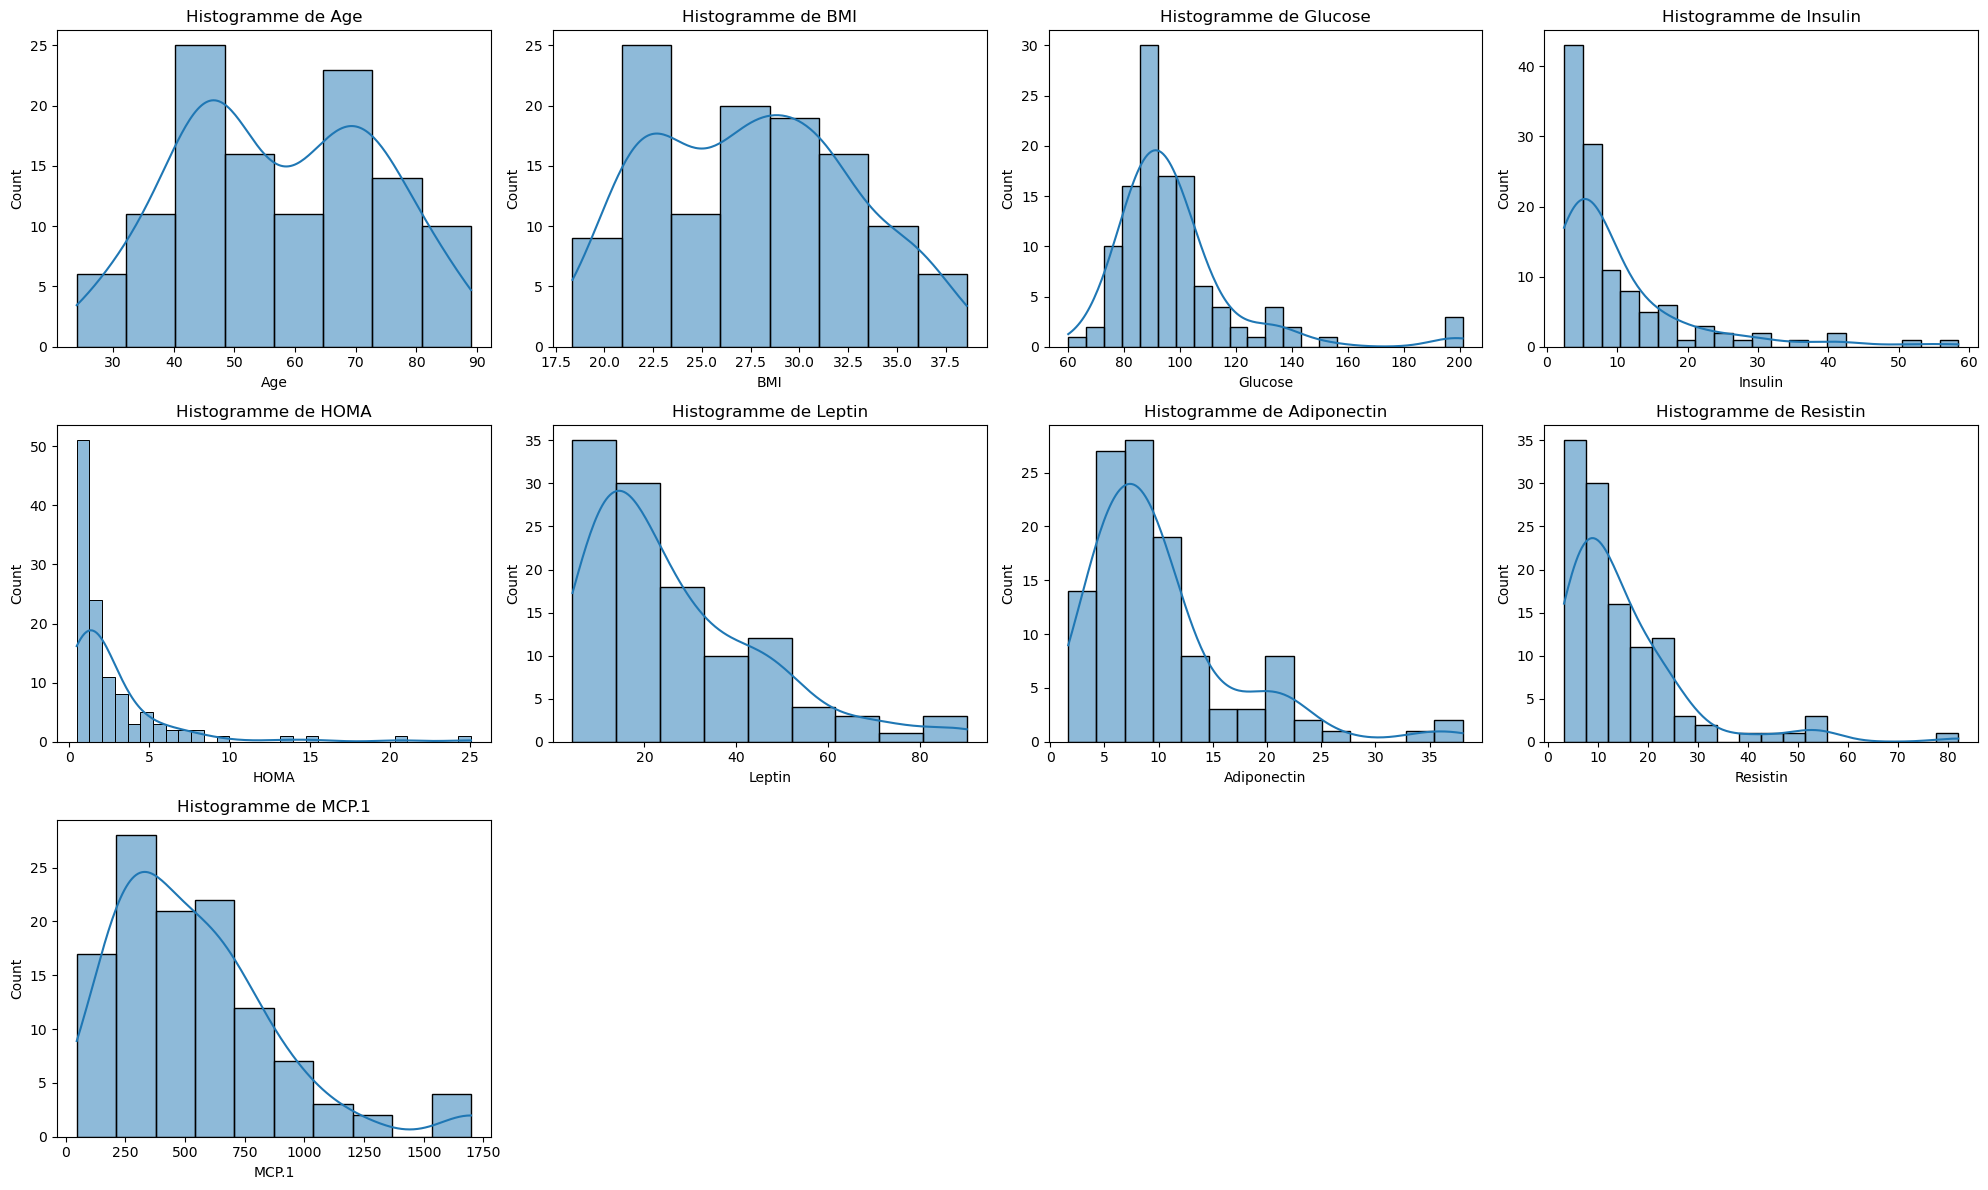

In [39]:
# Examinez la distribution des variables continues avec la courbe de la loi normale
#fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

variables = data.columns.tolist()
variables=variables[:-1]
num_plots = len(variables)
num_rows = (num_plots - 1) // 4 + 1  
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, 4*num_rows))

for i, variable in enumerate(variables):
    sns.histplot(data[variable], kde=True, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'Histogramme de {variable}')

for j in range(i+1, num_rows*4):
    fig.delaxes(axes[j//4, j%4])

plt.tight_layout()
plt.show()


In [40]:
data.shape

(116, 10)

In [41]:
data_init=data 

# Convertir en DataFrame
df = pd.DataFrame(data)

# Séparer les caractéristiques et la cible
X = df.drop(columns=['Classification'])  # Les caractéristiques (features) sont toutes les colonnes sauf 'Classification'
y = df['Classification']  # La cible est la colonne 'Classification'

# Initialiser le scaler
scaler = StandardScaler()  # Utiliser StandardScaler ou MinMaxScaler pour la normalisation

# Normaliser les données
X_normalized = scaler.fit_transform(X)  # Normaliser les caractéristiques

# Diviser les données en ensembles d'entraînement et de test, chacun avec 20 instances
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=20, train_size=20, random_state=42)

# Convertir les ensembles d'entraînement et de test en DataFrame
df_train = pd.DataFrame(X_train, columns=X.columns)
df_test = pd.DataFrame(X_test, columns=X.columns)

# Mettre à jour les données normalisées
data = df_train  # Remplacer les données initiales par les données normalisées
data.shape


(20, 9)

In [42]:
def euclidianDistance(point1,point2):
     return np.sqrt(np.sum((point1-point2)**2))

In [43]:
class Kmeans:
    """
    Implémentation de l'algorithme de clustering K-Means.

    Paramètres:
        K (int): Nombre de clusters

    Attributs:
        K (int): Nombre de clusters
        centroids (numpy.ndarray): Tableau contenant les centroids de chaque cluster

    Méthodes:
        __init__(self, K): Initialise l'instance Kmeans avec le nombre spécifié de clusters.
        initialize_centroids(self, X): Initialise les centroids pour chaque cluster en sélectionnant K points aléatoires du jeu de données.
        assign_points_centroids(self, X): Assignent chaque point du jeu de données au centroid le plus proche.
        compute_mean(self, X, points): Calcule la moyenne des points assignés à chaque centroid.
        fit(self, X, iterations=10): Effectue le clustering du jeu de données en utilisant l'algorithme K-Means.
        elbow(self, X, max_clusters=10): Utilise la méthode du coude pour trouver le nombre optimal de clusters.
        plot_clusters(self, X, assigned_points): Affiche le jeu de données avec les clusters assignés.
        evaluation(self, X, assigned_points): Évalue la performance du modèle en utilisant des métriques appropriées.
        inertia(self, X, assigned_points): Calcule l'inertie (somme des carrés des distances intra-cluster).

    """
    
    def __init__(self,data,K,plot):
        """
        ETAPE #1
        Initialise l'instance Kmeans avec le nombre spécifié de clusters.
        Paramètres:
            K (int): Nombre de clusters
        """
        self.K=K
        self.X=data
        self.plot_figure=plot
        
    def initialize_centroids(self):
        """
        ETAPE #2
        Initialise les centroids de maniere aleatoire en considerant les instances.


        """
        self.centroids=self.X.sample(n=self.K).values

    def assign_points_centroids(self): 
        """
        ETAPE #3
        Assignent chaque point du jeu de données au centroid le plus proche.
        """
       
        distances=[]
        for centroid in self.centroids:
            distances.append(np.array([euclidianDistance(point,centroid) for point in self.X.values]))
        return  np.argmin(np.array(distances),axis=0)

    def compute_mean(self, oldCluster):
        """
        ETAPE #4
        Calcule la moyenne des points assignés à chaque centroid et assigne assigne le nouveau centroid
        
        """
        newCentroids=[]
        for clusterIndex in range(len(self.centroids)):
            clusterPoints=self.X[oldCluster==clusterIndex]
            if(len(clusterPoints)>0):
                newCentroid=np.mean(clusterPoints,axis=0)
                newCentroids.append(newCentroid)
            else:
                newCentroid.append(centroids[clusterIndex])
        self.centroids=np.array(newCentroids)
    

    def fit(self, iterations=10):
        """
        ETAPE 5
        Effectue le clustering du jeu de données en utilisant l'algorithme K-Means.
        """
        self.initialize_centroids()
        #print(self.centroids)
        clusters=self.assign_points_centroids()
        #print(clusters)
        for i in range(iterations):#condition devrait lorsque le precedant cluster est egal au deuxieme
            # if(i==iterations-2):
                # print("precedent cluster")
                # print(clusters)
            self.compute_mean(clusters)
            clusters=self.assign_points_centroids()
        self.X['cluster']=clusters
        # print("final centroid")
        # print(self.centroids)
        # print("final cluster")
        print(self.X.shape)
        return (self.X,self.centroids)

    def plot_clusters(self):
        """
        Affiche le jeu de données avec les clusters assignés.

        Paramètres:
            X (numpy.ndarray): Jeu de données à clusteriser
            assigned_points (numpy.ndarray): Tableau contenant l'indice du centroid pour chaque point
        """
    

    def evaluation(self):
        """
        Évalue la performance du modèle en utilisant des métriques appropriées.

        Paramètres:
            X (numpy.ndarray): Jeu de données à clusteriser
            assigned_points (numpy.ndarray): Tableau contenant l'indice du centroid pour chaque point

        Retourne:
            float: Score d'évaluation
        """
        
    def calculate_silhouette_coefficient(self):
        data=self.X
        clusters = data['cluster'].values
        data = data.drop(columns=['cluster']).values
        n = len(data)
        silhouette_values = np.zeros(n)
        
        for i in range(n):
            cluster_index = clusters[i]
            cluster_points = data[clusters == cluster_index]
            a_i = np.mean([euclidianDistance(data[i], point) for point in cluster_points])
            
            b_i = float('inf')
            for j in range(len(clusters)):
                if clusters[j] != cluster_index:
                    other_cluster_points = data[clusters == clusters[j]]
                    b_ij = np.mean([euclidianDistance(data[i], point) for point in other_cluster_points])
                    b_i = min(b_i, b_ij)
            
            silhouette_values[i] = (b_i - a_i) / max(a_i, b_i)
            
        silhouette_coefficient=np.mean(silhouette_values)
        print("Le Coefficient de silhouette est :", silhouette_coefficient)

    def inertia(self):
        """
        Calcule l'inertie (somme des carrés des distances intra-cluster).

        Paramètres:
            X (numpy.ndarray): Jeu de données à clusteriser
            assigned_points (numpy.ndarray): Tableau contenant l'indice du centroid pour chaque point

        Retourne:
            float: Valeur de l'inertie
        """
        print(self.X.shape)
        data_np_array=self.X.to_numpy()
        centroids_np_array=self.centroids
        inertia = 0
        for i in range(len(data_np_array)):
            cluster_index = int(data_np_array[i][-1])  
            centroid = centroids_np_array[cluster_index]
            print(data_np_array[i][:-1],centroid.shape)
            inertia += np.sum((data_np_array[i][:-1] - centroid) ** 2)
        return inertia
        # print(self.X.shape,self.centroids.shape)
        # inertia = 0
        
            
        



### Calcul de l'inertie d'un clustering K-Means

Pour calculer l'inertie d'un clustering réalisé avec l'algorithme K-Means, vous pouvez suivre ces étapes :

1. **Exécuter K-Means :** Tout d'abord, exécutez l'algorithme K-Means sur vos données pour obtenir les centres de cluster et les affectations de cluster pour chaque point de données.

2. **Calculer les distances :** Ensuite, calculez la distance entre chaque point de données et son centre de cluster correspondant. La distance utilisée peut être la distance euclidienne ou toute autre métrique de distance appropriée selon le contexte.

3. **Calculer les carrés de distance :** Pour chaque point de données, calculez le carré de la distance entre ce point et son centre de cluster. Cela représente la distance au carré de ce point par rapport à son centre de cluster.

4. **Sommer les carrés de distance :** Sommez ces distances au carré pour tous les points de données dans chaque cluster. Cela vous donne la somme des carrés intra-cluster.

5. **Calculer l'inertie totale :** Enfin, additionnez les sommes des carrés intra-cluster pour tous les clusters. Cela vous donne l'inertie totale du clustering. Plus l'inertie est faible, meilleure est la qualité du clustering, car cela indique que les points à l'intérieur de chaque cluster sont plus proches les uns des autres.



![Logo](images/formule_inertia.jpg)

# Utilisation de la methode elbow pour determiner le nombre de clusters optimal

In [44]:
def elbow(X, max_clusters=10):
    """
    Utilise la méthode du coude pour trouver le nombre optimal de clusters.
    Utilise la libraire kneed pour recuperer cette valeur 

    Paramètres:
        X (numpy.ndarray): Jeu de données à clusteriser
        max_clusters (int): Nombre maximal de clusters à considérer (par défaut=10)

    Retourne:
        k (int) : le k optimal 
    """
    inertia_values=[]
    # Tester différentes valeurs de k
    for k in range(1, max_clusters):
        print(k)
        kmeans= Kmeans(data,k,False)
        kmeans.fit()
        inertia_values.append(kmeans.inertia())
        print(inertia_values)
    # Tracer la courbe du coude
    plt.plot(range(1, max_clusters), inertia_values, marker='o')
    plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
    plt.xlabel('Nombre de clusters (k)')
    plt.ylabel('Inertie') 
    plt.show()
    kneedle = KneeLocator(range(1, max_clusters), inertia_values, curve='convex', direction='decreasing')
    optimal_k = kneedle.elbow
    print("Nombre optimal de clusters (k):", optimal_k)
    return optimal_k


In [45]:
k_optimal=elbow(data,7)

1
(20, 10)
(20, 10)
[-0.51746179  0.97626267  1.61437141  1.48388877  1.52524036  0.8259668
  0.08997443 -0.7260985   0.35348282] (9,)
[-0.57979363  0.73380525  4.51255248  0.21447068  0.9031032  -0.44416177
 -0.89183516  3.15347727  3.37900904] (9,)
[ 0.4175159  -1.07231005  0.00922498 -0.43016426 -0.36320869 -0.75519668
 -0.79205501 -0.06594049 -0.40262363] (9,)
[-2.01342608 -0.94471495 -0.70417344 -0.59077433 -0.51504601 -0.32277183
  1.97968311 -0.77700178 -0.64142037] (9,)
[-0.82912101 -1.36484515 -0.52582383 -0.24531305 -0.30195635 -0.65574865
  1.4880324  -0.57436133 -1.36763005] (9,)
[-0.70445732 -1.35084081 -0.43664903 -0.65761206 -0.53845897 -0.71962156
  1.22826471 -0.09450874 -0.67777151] (9,)
[-0.2681344   1.842182    0.14298718  0.01625192 -0.04413739  0.02979095
  1.44547159 -0.36174367  0.46776532] (9,)
[-0.20580256  0.58038932 -0.34747423 -0.44642478 -0.40420517 -0.74784082
 -0.06596837 -0.36742571  2.01285104] (9,)
[-1.45243947 -0.66814439 -0.25829943  1.16586088  0.6

ValueError: operands could not be broadcast together with shapes (9,) (10,) 

In [ ]:
kmeans= Kmeans(data,k_optimal,True)

In [ ]:
# Entrainnement du model 
cluster_df,centroids=kmeans.fit()

# Visualistion du clustering



In [ ]:
# Visualistion du clustering


# Évaluation de la qualité des clusters avec le coefficient de silhouette

Le coefficient de silhouette est une mesure essentielle pour évaluer la qualité des regroupements (clusters) dans l'analyse de données. Il permet d'évaluer à quel point les points de données sont proches les uns des autres à l'intérieur des clusters et à quel point ils sont séparés des points des autres clusters. En d'autres termes, il fournit une indication sur la séparation entre les clusters.

## Comment est calculé le coefficient de silhouette ?

Pour chaque point de données :

1. On calcule la distance moyenne (a) entre ce point et tous les autres points dans le même cluster. Une distance moyenne faible indique une bonne cohésion à l'intérieur du cluster.

2. Ensuite, on calcule la distance moyenne la plus proche (b) entre le point donné et tous les points dans le cluster voisin le plus proche. Une distance moyenne faible ici indique une bonne séparation des clusters.

3. Le coefficient de silhouette (s) pour le point est alors calculé avec la formule :
   s = (b - a) / max(a, b)

## Interprétation du coefficient de silhouette

Le coefficient de silhouette pour l'ensemble des données est la moyenne des coefficients de silhouette pour chaque point. Il varie de -1 à 1 :

- Un coefficient de silhouette proche de 1 indique une bonne séparation entre les clusters.
- Un coefficient de silhouette proche de 0 indique un chevauchement significatif entre les clusters.
- Un coefficient de silhouette proche de -1 indique que les points pourraient être mieux répartis dans des clusters différents.

## Conclusion

En pratique, un coefficient de silhouette élevé est souvent désirable, car il suggère une bonne séparation entre les clusters. Cependant, il est important de l'interpréter conjointement avec d'autres métriques d'évaluation pour obtenir une vue complète de la performance du clustering.
e du clustering.


In [ ]:
# Evaluation du model en calculant le coefficient de silhouette :
kmeans.calculate_silhouette_coefficient()